In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("CV files//ChurnData.csv")

In [4]:
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


# Data pre-processing

In [5]:
# Checking If there is any missing value
df.columns[df.isnull().any()]

Index([], dtype='object')

In [6]:
# Their is no missing value in our dataset that means we are good to go

# Find Important Columns

In [7]:
#Using Pearson Correlation
cor = df.corr()
cor_target = abs(cor["churn"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

tenure      0.376860
employ      0.337969
callcard    0.311451
loglong     0.336869
churn       1.000000
Name: churn, dtype: float64

# KNN

# 70% of data for Training and 30% for Testing

In [18]:
y = df["churn"]
featureset = df[["tenure", "employ", "callcard", "loglong"]]
featureset.head()

,tenure,employ,callcard,loglong
0,11.0,5.0,1.0,1.482
1,33.0,0.0,0.0,2.246
2,23.0,2.0,0.0,1.841
3,38.0,10.0,1.0,1.800
4,7.0,15.0,1.0,1.960


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( featureset, y, test_size=0.3, random_state=4)
print ('Train set:', x_train.shape, y_train.shape)     # 140 rows for Training (70%)
print ('Test set:', x_test.shape, y_test.shape)       # 60 rows for Testing (30%)

Train set: (140, 4) (140,)
Test set: (60, 4) (60,)


In [20]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

In [22]:
inp = [[7.0, 15.0, 1.0, 1.9]]
out = neigh.predict(inp)
print(out)

[0.]


# Accuracy

In [53]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, neigh.predict(x_test)))

Train set Accuracy:  0.8428571428571429
Test set Accuracy:  0.7333333333333333


# Performance

In [54]:
from sklearn.metrics import confusion_matrix
cnf_matrix1 = confusion_matrix(y_train,neigh.predict(x_train))
cnf_matrix2 = confusion_matrix(y_test,neigh.predict(x_test))
print(cnf_matrix1)
print(cnf_matrix2)
print("Performance (training data)= ", (90+28)/np.sum(cnf_matrix1))
print("Performance (testing data)= ", (38+6)/np.sum(cnf_matrix2))

[[90  9]
 [13 28]]
[[38  5]
 [11  6]]
Performance (training data)=  0.8428571428571429
Performance (testing data)=  0.7333333333333333


# SVM

In [23]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train) 

SVC(kernel='linear')

In [25]:
inp = [[7.0, 15.0, 1.0, 1.9]]
out = clf.predict(inp)
print(out)

[0.]


# Accuracy

In [56]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, clf.predict(x_test)))

Train set Accuracy:  0.7214285714285714
Test set Accuracy:  0.7666666666666667


# Performance

In [57]:
from sklearn.metrics import confusion_matrix
cnf_matrix1 = confusion_matrix(y_train,clf.predict(x_train))
cnf_matrix2 = confusion_matrix(y_test,clf.predict(x_test))
print(cnf_matrix1)
print(cnf_matrix2)
print("Performance (training data)= ", (83+18)/np.sum(cnf_matrix1))
print("Performance (testing data)= ", (40+6)/np.sum(cnf_matrix2))

[[83 16]
 [23 18]]
[[40  3]
 [11  6]]
Performance (training data)=  0.7214285714285714
Performance (testing data)=  0.7666666666666667


# Decision Tree

[Text(1063.6875, 784.0384615384615, 'X[3] <= 2.387\nentropy = 0.872\nsamples = 140\nvalue = [99, 41]'),
 Text(851.9464285714286, 721.3153846153846, 'X[1] <= 12.0\nentropy = 0.981\nsamples = 93\nvalue = [54, 39]'),
 Text(548.0357142857142, 658.5923076923077, 'X[0] <= 19.5\nentropy = 1.0\nsamples = 73\nvalue = [37, 36]'),
 Text(259.07142857142856, 595.8692307692307, 'X[3] <= 0.843\nentropy = 0.954\nsamples = 40\nvalue = [15, 25]'),
 Text(219.2142857142857, 533.1461538461538, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(298.9285714285714, 533.1461538461538, 'X[1] <= 2.5\nentropy = 0.927\nsamples = 38\nvalue = [13, 25]'),
 Text(79.71428571428571, 470.4230769230769, 'X[0] <= 7.5\nentropy = 1.0\nsamples = 14\nvalue = [7, 7]'),
 Text(39.857142857142854, 407.7, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(119.57142857142856, 407.7, 'X[3] <= 1.771\nentropy = 0.946\nsamples = 11\nvalue = [7, 4]'),
 Text(79.71428571428571, 344.9769230769231, 'entropy = 0.0\nsamples = 4\nvalue = [4

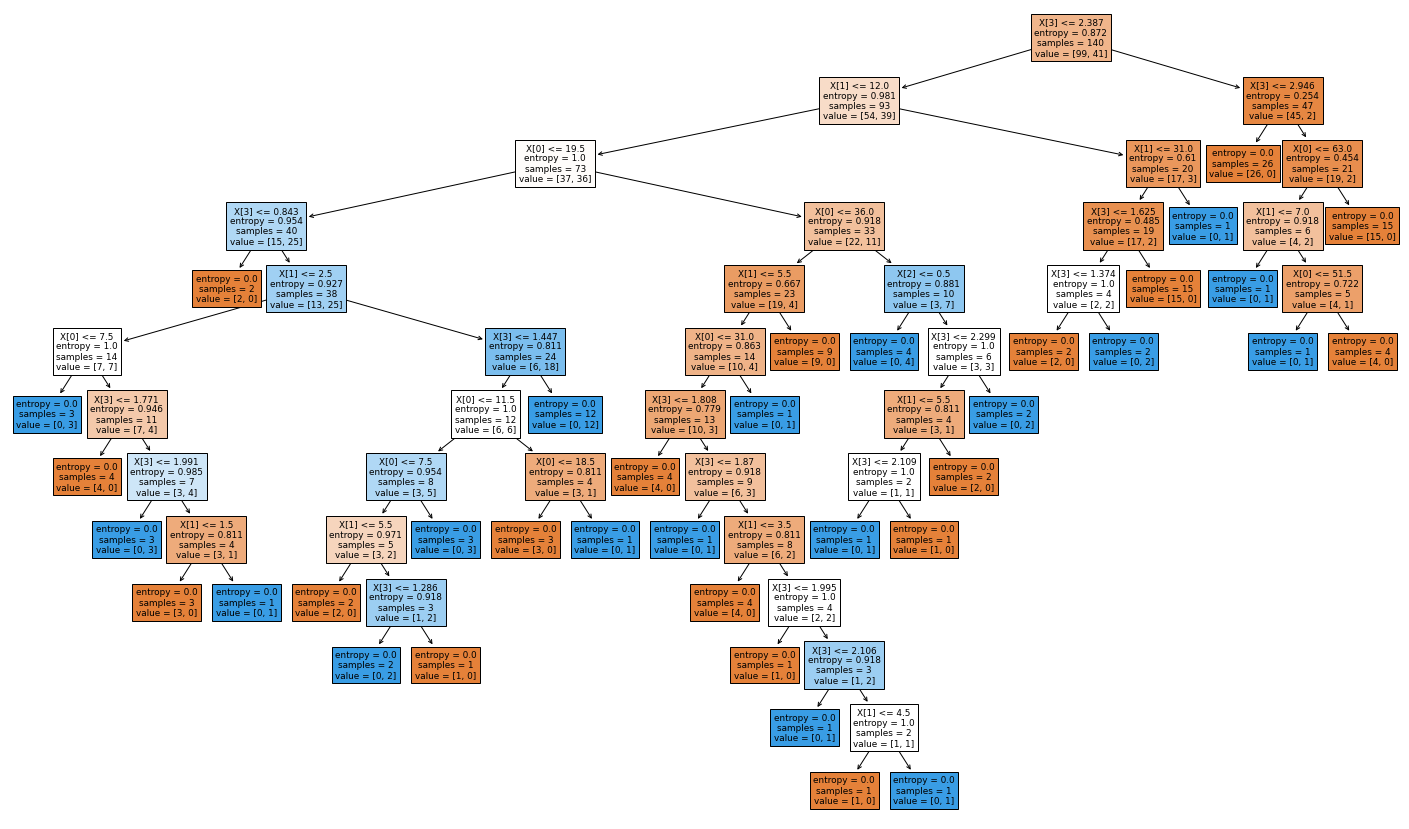

In [58]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
obj = DecisionTreeClassifier(criterion="entropy")
# Fit 
obj = obj.fit(x_train,y_train)
# Plot
plt.figure(figsize=(25,15))
tree.plot_tree(obj, filled = True)

# Accuracy

In [59]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, obj.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, obj.predict(x_test)))

Train set Accuracy:  1.0
Test set Accuracy:  0.6


# Performance

In [60]:
from sklearn.metrics import confusion_matrix
cnf_matrix1 = confusion_matrix(y_train,obj.predict(x_train))
cnf_matrix2 = confusion_matrix(y_test,obj.predict(x_test))
print(cnf_matrix1)
print(cnf_matrix2)
print("Performance (training data)= ", (99+41)/np.sum(cnf_matrix1))
print("Performance (testing data)= ", (30+6)/np.sum(cnf_matrix2))

[[99  0]
 [ 0 41]]
[[30 13]
 [11  6]]
Performance (training data)=  1.0
Performance (testing data)=  0.6


# Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter = 500).fit(x_train,y_train)
LR

LogisticRegression(max_iter=500)

# Accuracy

In [62]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, LR.predict(x_test)))

Train set Accuracy:  0.7357142857142858
Test set Accuracy:  0.7333333333333333


# Performance

In [63]:
from sklearn.metrics import confusion_matrix
cnf_matrix1 = confusion_matrix(y_train,LR.predict(x_train))
cnf_matrix2 = confusion_matrix(y_test,LR.predict(x_test))
print(cnf_matrix1)
print(cnf_matrix2)
print("Performance (training data)= ", (88+15)/np.sum(cnf_matrix1))
print("Performance (testing data)= ", (40+4)/np.sum(cnf_matrix2))

[[88 11]
 [26 15]]
[[40  3]
 [13  4]]
Performance (training data)=  0.7357142857142858
Performance (testing data)=  0.7333333333333333
